In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import math

#プロット用です
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn import metrics

import statsmodels.api as sm

//anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


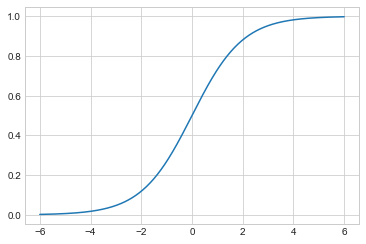

In [4]:
def logistic(t):
    return 1.0 / (1 + math.exp(-1.0*t))

t = np.linspace(-6,6,500)

y = np.array([logistic(ele) for ele in t])
              
plt.plot(t,y)

In [6]:
df = sm.datasets.fair.load_pandas().data

In [7]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [11]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0
    
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [12]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_affair,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1,1


In [13]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_affair
Had_Affair,,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000,0
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243,1


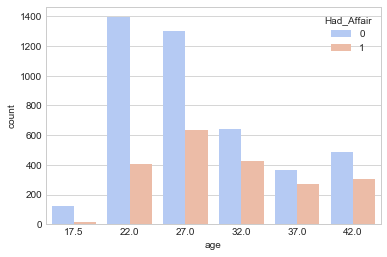

In [16]:
sns.countplot('age',data=df.sort_values('age'),hue='Had_Affair',palette='coolwarm')

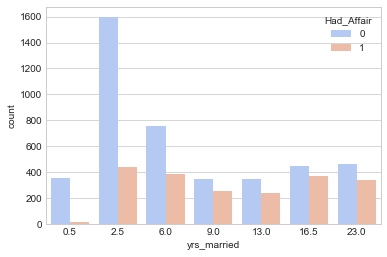

In [22]:
sns.countplot('yrs_married',data=df.sort_values('yrs_married'),hue='Had_Affair',palette='coolwarm')

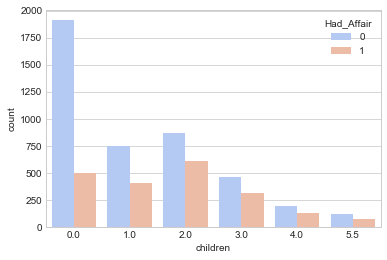

In [25]:
sns.countplot('children',data=df.sort_values('children'),hue='Had_Affair',palette='coolwarm')

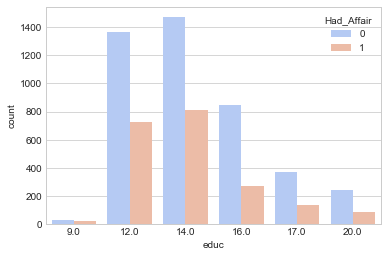

In [26]:
sns.countplot('educ',data=df.sort_values('educ'),hue='Had_Affair',palette='coolwarm')